In [3]:
!python -V

Python 3.10.13


In [4]:
import pandas as pd
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [7]:
df1 = pd.read_parquet("data/homework_1/yellow_tripdata_2023-01.parquet")
df2 = pd.read_parquet("data/homework_1/yellow_tripdata_2023-01.parquet")


In [8]:
df = pd.concat([df1, df2])

## Q1. Downloading the data

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

In [9]:
print("There are a total of", len(df.columns),"columns.")

There are a total of 19 columns.


## Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

    

In [10]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 6133532 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [12]:
df["duration"] = df["tpep_dropoff_datetime"] - df['tpep_pickup_datetime']
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
dur_std = df['duration'].std() 

print("The Standard Deviation of Trip Duration is", dur_std )

The Standard Deviation of Trip Duration is 42.594347769700754


## Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [13]:
df3 = df[(df.duration >= 1) & (df.duration <= 60)]

In [14]:
print("The original dataset was",len(df),"rows, and the newer dataset was", len(df3),"rows. So we are left with",round(len(df3)/len(df),2)*100 ,"percent of the original dataset.")

The original dataset was 6133532 rows, and the newer dataset was 6018346 rows. So we are left with 98.0 percent of the original dataset.


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

    Turn the dataframe into a list of dictionaries
    Fit a dictionary vectorizer
    Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

    2
    155
    345
    515
    715


In [15]:
# Convert columns to 'category' if they have a limited number of unique values

df2[["PULocationID","DOLocationID"]] = df2[["PULocationID","DOLocationID"]].astype(str)
q4_one_hot = df2[["PULocationID", "DOLocationID","trip_distance"]]
q4_one_hot = q4_one_hot.to_dict(orient = "records")


In [16]:
v = DictVectorizer()


In [17]:
X = v.fit_transform(q4_one_hot)

: 

In [ ]:
X.shape

(2938060, 515)

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

    Train a plain linear regression model with default parameters
    Calculate the RMSE of the model on the training data

What's the RMSE on train?

    6.99
    11.99
    16.99
    21.99


In [ ]:
X_train = X
y_train = df2['duration'].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_pred, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.10299726399678

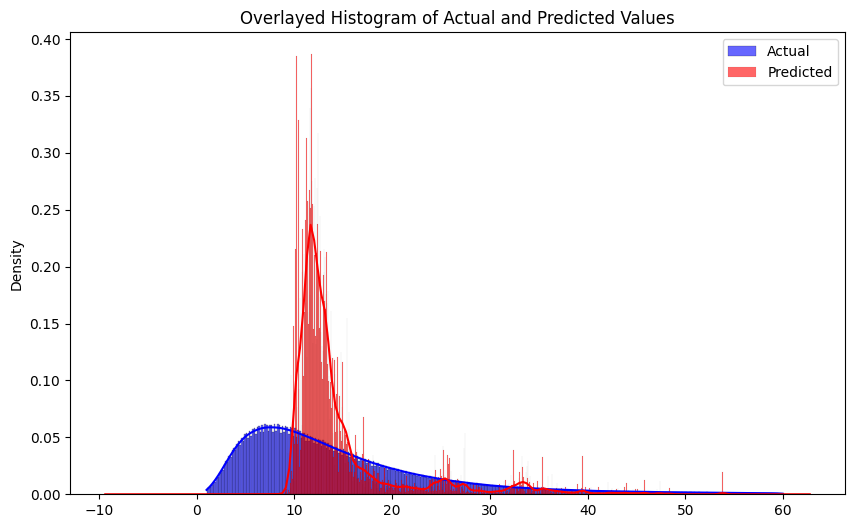

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, color='blue', kde=True, stat='density', label='Actual', alpha=0.6)
sns.histplot(y_pred, color='red', kde=True, stat='density', label='Predicted', alpha=0.6)
plt.legend()
plt.title('Overlayed Histogram of Actual and Predicted Values')
plt.show()